# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

Problem Statement: A used car dealership has tasked us with understanding what drives the price of a car. They have provided us with a used car dataset containing various features of the cars as well as their sale prices.

First off, we know our dataset has labels (i.e. prices), so we know that this will be a supervised machine learning problem. As a result, we will either approach this problem using regression or classification techniques.

Since price is a continuous variable, we will be using regression techniques to try to predict the price of used cars and better understand the features that have a stronger effect on the price.

### Data Understanding and Data Preparation

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [1]:
# import necessary EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

# Didn't like the output in scientific notation, so I made an adjustment using set_option
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [2]:
# load dataset
df = pd.read_csv('data/vehicles.csv")

In [3]:
df.shape

(426880, 18)

In [4]:
df.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
110201,7307769516,sarasota-bradenton,30888,2017,ford,expedition,NaN,NaN,other,76462,clean,automatic,1FMJU1KT8HEA48877,fwd,NaN,SUV,black,fl
342242,7314256366,rhode island,12995,2014,jeep,compass,excellent,NaN,gas,83810,clean,automatic,1C4NJDEB6ED642128,4wd,NaN,SUV,blue,ri
355745,7308511662,knoxville,35969,2017,chevrolet,silverado 1500,NaN,8 cylinders,gas,90170,clean,automatic,NaN,4wd,full-size,pickup,silver,tn
234701,7315706066,eastern NC,1200,1995,toyota,celica gt,fair,3 cylinders,gas,220000,clean,manual,NaN,NaN,compact,convertible,red,nc
405211,7304638378,kennewick-pasco-richland,36999,2017,dodge,durango gt awd gas suv,NaN,NaN,gas,31140,clean,automatic,1C4RDJDG2HC893503,4wd,NaN,SUV,grey,wa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

#### Check for Missing Values & Duplicates

In [6]:
df.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [7]:
# Check missing values % of respective column
df.isna().mean().multiply(100)

id              0
region          0
price           0
year            0
manufacturer    4
model           1
condition      41
cylinders      42
fuel            1
odometer        1
title_status    2
transmission    1
VIN            38
drive          31
size           72
type           22
paint_color    31
state           0
dtype: float64

In [8]:
# Checking if ID and VIN columns only contain unique values
df[['id','VIN']].nunique()

id     426880
VIN    118246
dtype: int64

Strangely, we can see that the VIN column is not always unique indicating that there are duplicates (even if we account for the missing values)

In [9]:
df.describe(include = 'O')

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
count,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426880
unique,404,42,29649,6,8,5,6,3,118246,3,4,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,3608,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,50614


In [10]:
# Investigating the most frequent VIN value
df.query('VIN == "1FMJU1JT1HEA52352"')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
76,7311818189,auburn,29590,2017,ford,expedition xlt sport,good,6 cylinders,gas,70760,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,al
707,7311865995,birmingham,29590,2017,ford,expedition xlt sport,good,6 cylinders,gas,70760,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,al
1935,7311801032,dothan,29590,2017,ford,expedition xlt sport,good,6 cylinders,gas,70760,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,al
2201,7311915565,florence / muscle shoals,29590,2017,ford,expedition xlt sport,good,6 cylinders,gas,70760,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,al
2377,7311823034,gadsden-anniston,29590,2017,ford,expedition xlt sport,good,6 cylinders,gas,70760,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420611,7311842926,madison,29590,2017,ford,expedition xlt sport,good,6 cylinders,gas,70760,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,wi
423786,7311784162,milwaukee,29590,2017,ford,expedition xlt sport,good,6 cylinders,gas,70760,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,wi
425368,7311832579,sheboygan,29590,2017,ford,expedition xlt sport,good,6 cylinders,gas,70760,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,wi
425834,7311967545,wausau,29590,2017,ford,expedition xlt sport,good,6 cylinders,gas,70760,clean,other,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,wi


It does appear to be the exact same car sold at the same price with the only differences being in the Region and State columns. It seems unlikely that the same car would sell 261 times for the same price in various places, so I want to drop these duplicate rows but this also calls into question the validity of the Region and State columns. The question is which row (and therefore Region and State) should be kept? Since this discovery reveals uncertainty about the Region and State columns, we will probably want to refrain from using them in our model.

In [11]:
# Drop duplicate and NaN VIN rows 
df.drop_duplicates(subset = ['VIN'], inplace = True)
df.dropna(subset = ['VIN'], inplace = True)

In [12]:
# Dropping the id and VIN columns as they are now unique values that won't be useful for our model
df.drop({'id', 'VIN', 'region', 'state'}, axis = 1, inplace = True)

In [13]:
df.describe(include = 'O')

,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color
count,115179,117542,61082,70266,116608,114608,117010,90898,30310,102062,87564
unique,41,17549,6,8,5,6,3,3,4,13,12
top,ford,f-150,excellent,4 cylinders,gas,clean,automatic,4wd,full-size,sedan,white
freq,18792,2651,32065,26126,100636,112363,101492,40259,15703,28745,22797


In [14]:
df.duplicated().sum()

183

In [15]:
# Remove duplicates since it's a relatively small number compared to entire dataset
df.drop_duplicates(inplace = True)

#### Univariate Analysis of Target Column (Price)

In [16]:
df['price'].describe()

count      118063
mean        17849
std        360192
min             0
25%          6000
50%         13329
75%         23988
max     123456789
Name: price, dtype: float64

Based on our results above, we can see that the price data is right-skewed since the mean is larger than the median. Also, we definitely have some big outliers as the standard deviation and maximum value are very large. Let's investigate the distribution with a histogram and the outliers with a box plot.

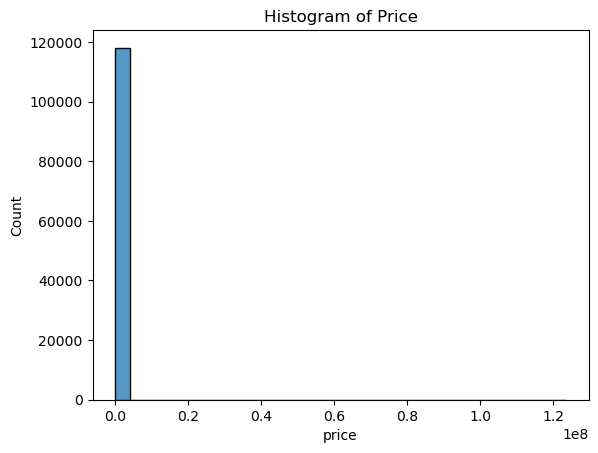

In [17]:
# We can see that the large outliers are affecting the x-axis range and making it impossible to see the distribution
sns.histplot(df['price'], bins = 30).set_title('Histogram of Price');

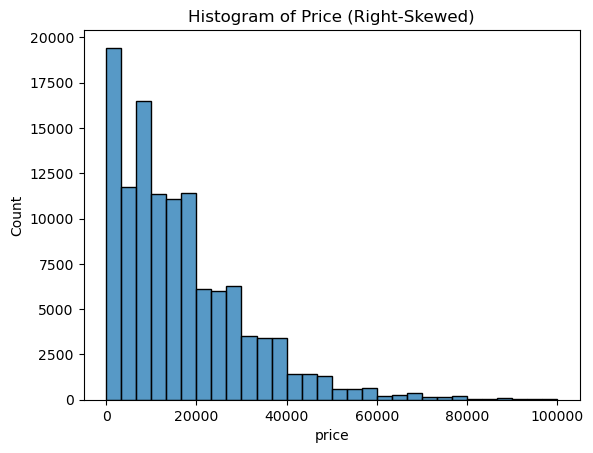

In [18]:
# Let's restrict the dataset to only rows with price less than $100,000 and plot again to see
sns.histplot(df.query('price < 100_000'), x = 'price', bins = 30).set_title('Histogram of Price (Right-Skewed)');

For our regression, we will want a normal distribution of the price variable so let's add the logarithm of price to our dataframe and plot again

In [19]:
# The warning message highlighted that there are some rows with price equal to $0, which are rows we will most likely want to drop
df['price_log'] = np.log(df['price'])
df.head(5)

C:\Users\tbambanian\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price_log
27,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923,clean,other,NaN,NaN,pickup,white,10
28,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229,clean,other,NaN,NaN,pickup,blue,10
29,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160,clean,other,NaN,NaN,pickup,red,11
30,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124,clean,other,NaN,NaN,pickup,red,10
32,27990,2012,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696,clean,other,4wd,NaN,pickup,black,10


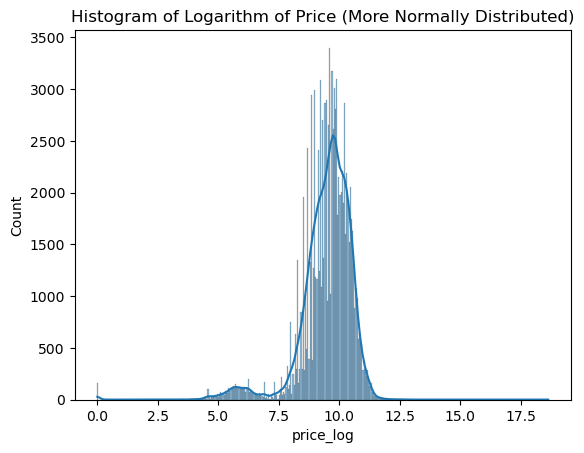

In [20]:
sns.histplot(df['price_log'], kde = True).set_title('Histogram of Logarithm of Price (More Normally Distributed)');

In [21]:
# Filtered out 12,467 rows where price is equal to $0
df_filtered = df.query('price != 0').reset_index(drop = True)
df.shape[0] - df_filtered.shape[0]

12575

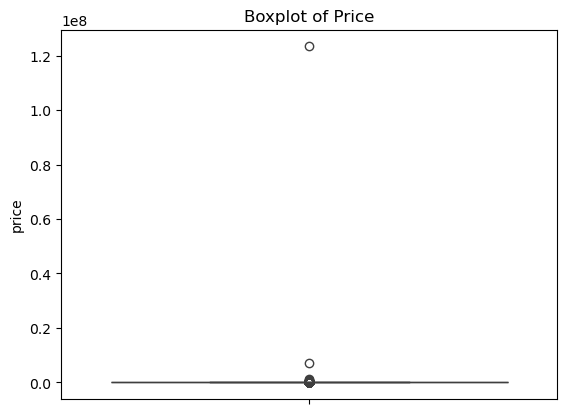

In [22]:
# Boxplot indicates there are some big outliers
sns.boxplot(df_filtered['price']).set_title('Boxplot of Price');

#### Handle Outliers

In [23]:
# Z-Score method works better on a normal distribution, so let's do it on the price_log column instead of the price column
df_zscore = df_filtered[np.abs(stats.zscore(df_filtered['price_log'])) < 3].copy()

In [24]:
# Z-Score method removed 2,910 outliers
df_filtered.shape[0] - df_zscore.shape[0]

2913

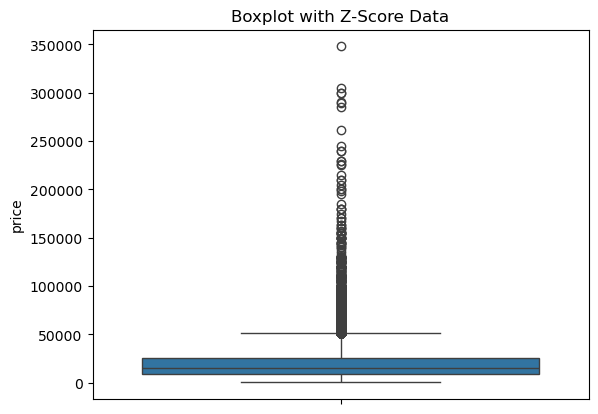

In [25]:
sns.boxplot(df_zscore['price']).set_title('Boxplot with Z-Score Data');

Z-Score method at the +/- 3 z-scores threshold didn't remove much data and we can see from the box plot above that there are still many outliers remaining. Even if we reduce the threshold down to +/- 2 z-scores it only increases to 4,394 rows removed and still leaves a lot of outliers. Let's see if the IQR method works better.

In [26]:
iqr = df_filtered['price_log'].quantile(.75) - df_filtered['price_log'].quantile(.25)
iqr

1.1227921155762814

In [27]:
lower_bound = df_filtered['price_log'].quantile(.25) - 1.5 * iqr
upper_bound = df_filtered['price_log'].quantile(.75) + 1.5 * iqr
lower_bound, upper_bound

(7.327579301231756, 11.818747763536882)

In [28]:
df_iqr = df_filtered[(df_filtered['price_log'] > lower_bound) & (df_filtered['price_log'] < upper_bound)].copy()

In [29]:
df_filtered.shape[0] - df_iqr.shape[0]

4524

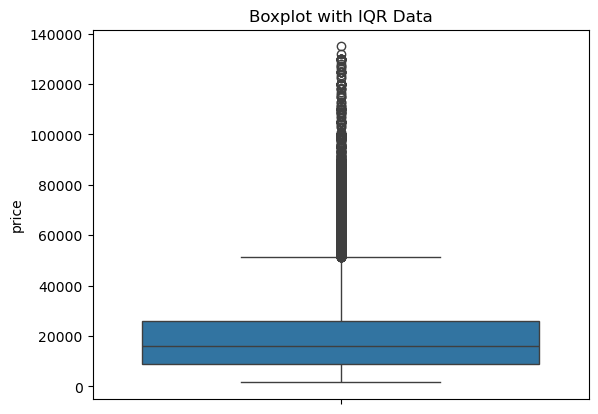

In [30]:
sns.boxplot(df_iqr['price']).set_title('Boxplot with IQR Data');

IQR method seems to be better than Z-Score for handling outliers, so we will use IQR for our cleaned dataset

In [31]:
df_iqr.sort_values('price', ascending = True).reset_index(drop = True)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price_log
0,1550,2000,toyota,4runner,fair,6 cylinders,gas,180000,clean,automatic,rwd,full-size,SUV,green,7
1,1550,2003,saturn,l300,fair,6 cylinders,gas,114736,clean,automatic,fwd,mid-size,sedan,blue,7
2,1575,2003,volvo,s80,excellent,6 cylinders,gas,205960,clean,automatic,fwd,NaN,sedan,silver,7
3,1575,2002,ford,windstar,fair,6 cylinders,gas,208676,clean,automatic,NaN,full-size,mini-van,blue,7
4,1595,1995,toyota,camry dx,NaN,4 cylinders,gas,248328,clean,automatic,fwd,NaN,sedan,custom,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100959,129991,2020,jeep,wrangler unlimited,NaN,8 cylinders,gas,5693,clean,automatic,4wd,NaN,NaN,black,12
100960,129995,2007,ferrari,f430 spider,NaN,NaN,gas,12351,clean,manual,NaN,NaN,convertible,black,12
100961,129999,2014,porsche,911,excellent,6 cylinders,gas,15449,clean,manual,NaN,NaN,NaN,NaN,12
100962,131950,2019,mercedes-benz,amg gt,NaN,NaN,gas,7100,clean,automatic,NaN,NaN,coupe,grey,12


#### Bivariate Analysis

Numerical Features

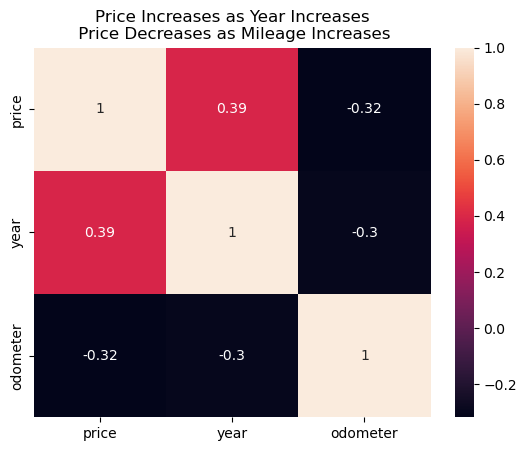

In [32]:
sns.heatmap(df_iqr[['price','year','odometer']].corr(), annot = True).set_title("Price Increases as Year Increases\n Price Decreases as Mileage Increases");

Categorical Features

Now I want to narrow down my categorical columns to about 2 or 3 in order to have a simpler model. I'll need to encode these categorical columns to numeric so I will also try to pick categories with a low number of unique values to avoid the curse of dimensionality. Right off the bat we can see that the Model column has far too many unique values, so I will drop that column.

In [33]:
df_iqr.describe(include = 'O')

,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color
count,98169,100450,55231,61056,99608,98192,100080,78365,26646,87416,78244
unique,41,15643,6,8,5,6,3,3,4,13,12
top,ford,f-150,excellent,6 cylinders,gas,clean,automatic,4wd,full-size,sedan,white
freq,16114,2253,28433,22537,86566,96027,85652,34387,13831,24432,20206


In [34]:
df_iqr.drop(['model'], axis = 1, inplace = True)

In [35]:
# Grouping the manufacturer column by their geographic regions respectively
American = {'buick', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ford', 'gmc', 'harley-davidson', 'jeep', 'lincoln', 'mercury', 'pontiac', 'ram', 'saturn', 'tesla'}  
European = {'alfa-romeo', 'aston-martin', 'audi', 'bmw', 'ferrari', 'fiat', 'jaguar', 'land rover', 'mercedes-benz', 'mini', 'porsche', 'rover', 'volkswagen', 'volvo'} 
Asian = {'acura', 'datsun', 'honda', 'hyundai', 'infiniti', 'kia', 'lexus', 'mazda', 'mitsubishi', 'nissan', 'subaru', 'toyota'}

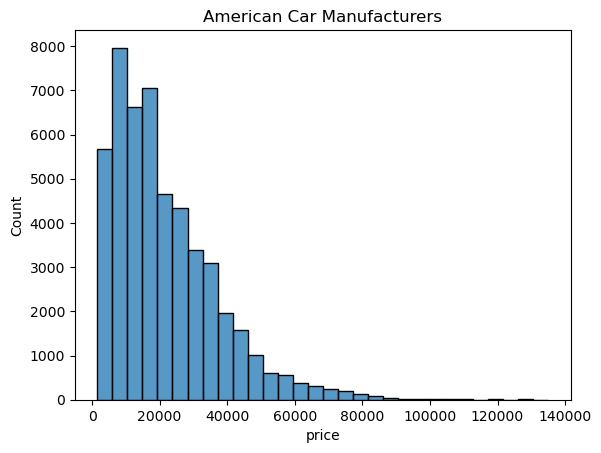

In [36]:
sns.histplot(df_iqr.query('manufacturer in @American')['price'], bins = 30).set_title('American Car Manufacturers');

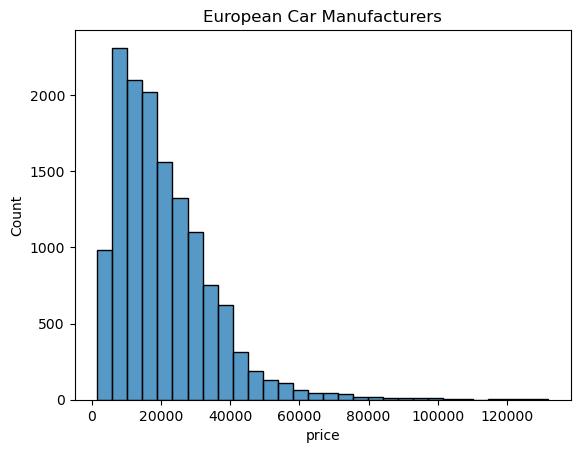

In [37]:
sns.histplot(df_iqr.query('manufacturer in @European')['price'], bins = 30).set_title('European Car Manufacturers');

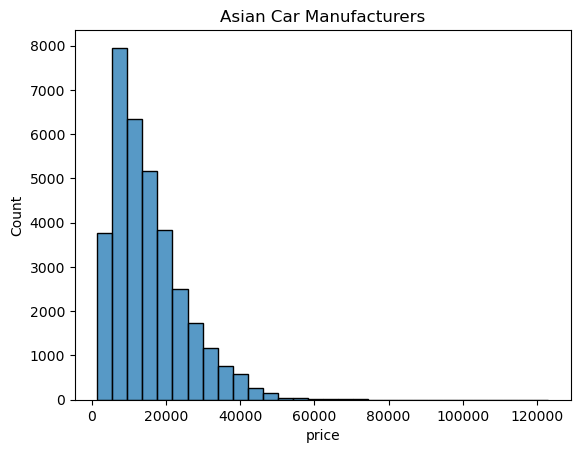

In [38]:
sns.histplot(df_iqr.query('manufacturer in @Asian')['price'], bins = 30).set_title('Asian Car Manufacturers');

In [39]:
df_iqr.query('manufacturer in @American')['price'].describe()

count    49975
mean     21596
std      15519
min       1550
25%       9950
50%      17898
75%      29900
max     135000
Name: price, dtype: float64

In [40]:
df_iqr.query('manufacturer in @European')['price'].describe()

count    13825
mean     21007
std      14583
min       1575
25%      10888
50%      17590
75%      27990
max     131950
Name: price, dtype: float64

In [41]:
df_iqr.query('manufacturer in @Asian')['price'].describe()

count    34369
mean     15305
std       9782
min       1550
25%       7995
50%      12995
75%      19990
max     122995
Name: price, dtype: float64

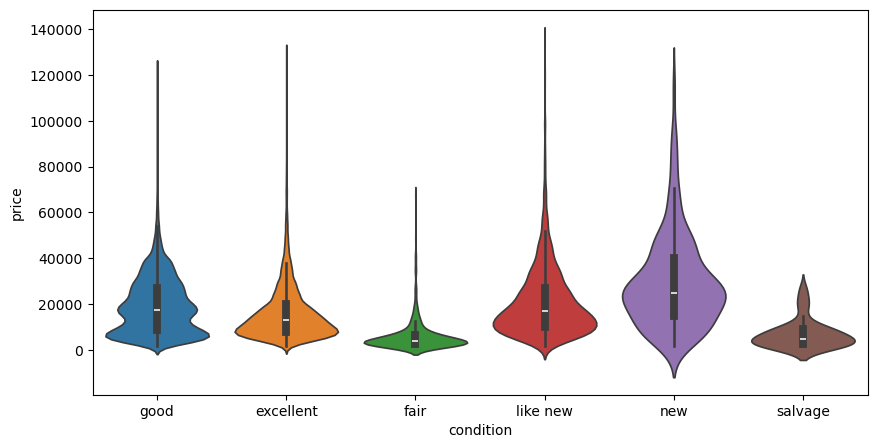

In [42]:
plt.figure(figsize = (10,5))
sns.violinplot(data = df_iqr, x = 'condition', y = 'price', hue = 'condition', legend = False);

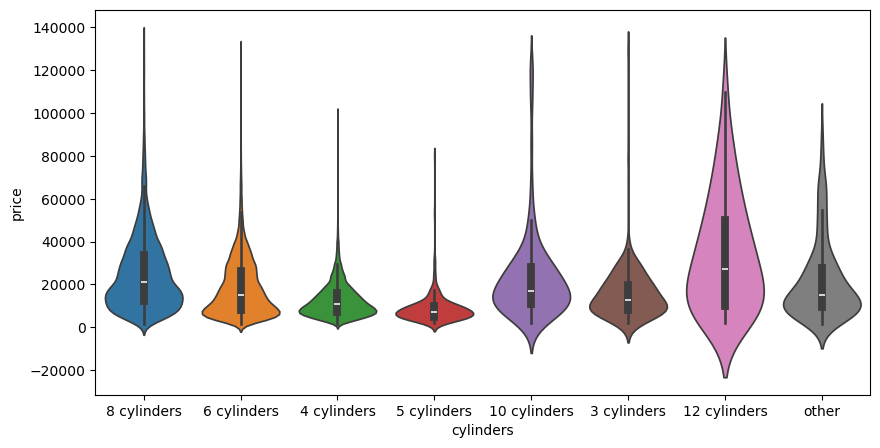

In [43]:
plt.figure(figsize = (10,5))
sns.violinplot(data = df_iqr, x = 'cylinders', y = 'price', hue = 'cylinders', legend = False);

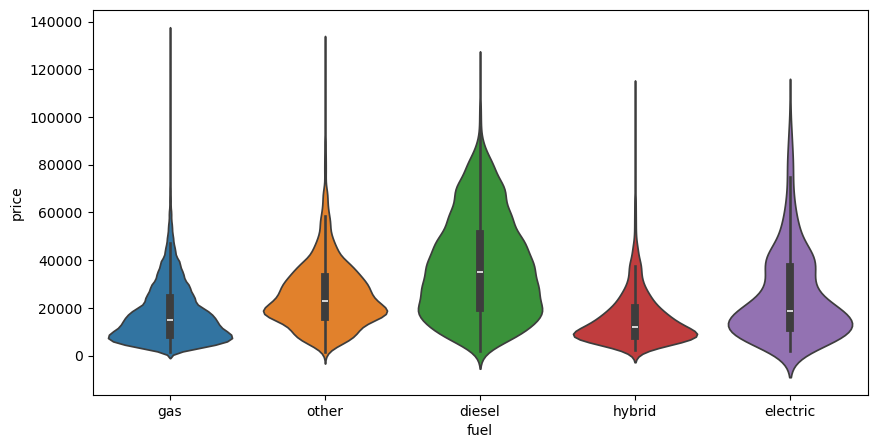

In [44]:
plt.figure(figsize = (10,5))
sns.violinplot(data = df_iqr, x = 'fuel', y = 'price', hue = 'fuel', legend = False);

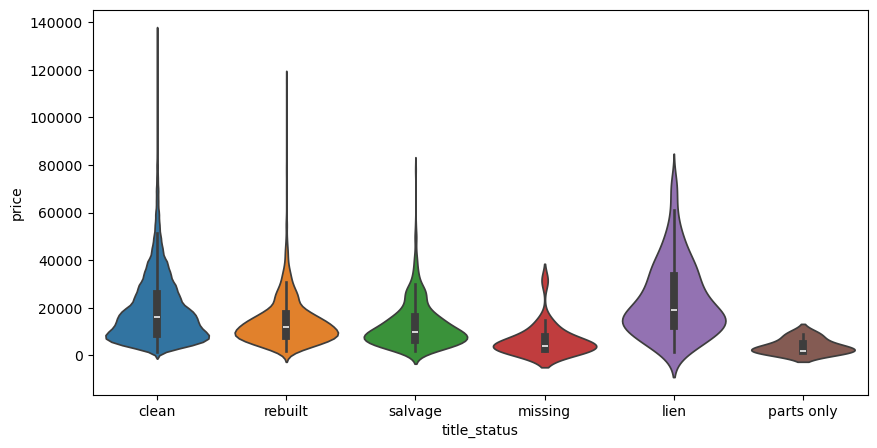

In [45]:
plt.figure(figsize = (10,5))
sns.violinplot(data = df_iqr, x = 'title_status', y = 'price', hue = 'title_status', legend = False);

<Axes: xlabel='transmission', ylabel='price'>

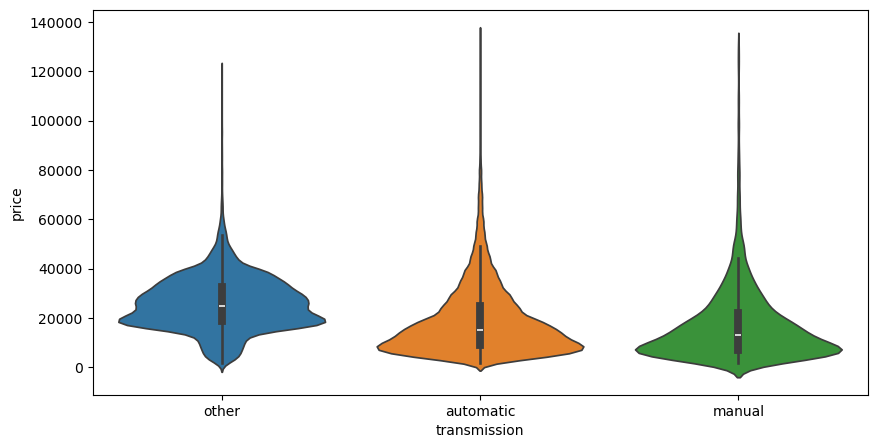

In [46]:
plt.figure(figsize = (10,5))
sns.violinplot(data = df_iqr, x = 'transmission', y = 'price', hue = 'transmission', legend = False)

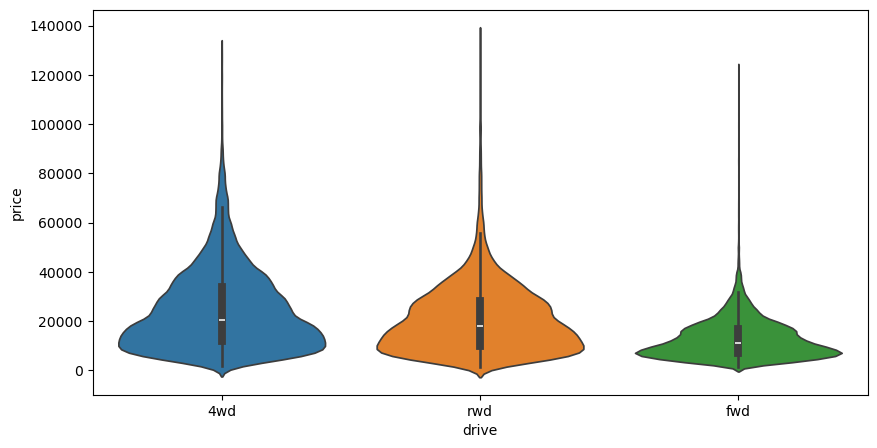

In [47]:
plt.figure(figsize = (10,5))
sns.violinplot(data = df_iqr, x = 'drive', y = 'price', hue = 'drive', legend = False);

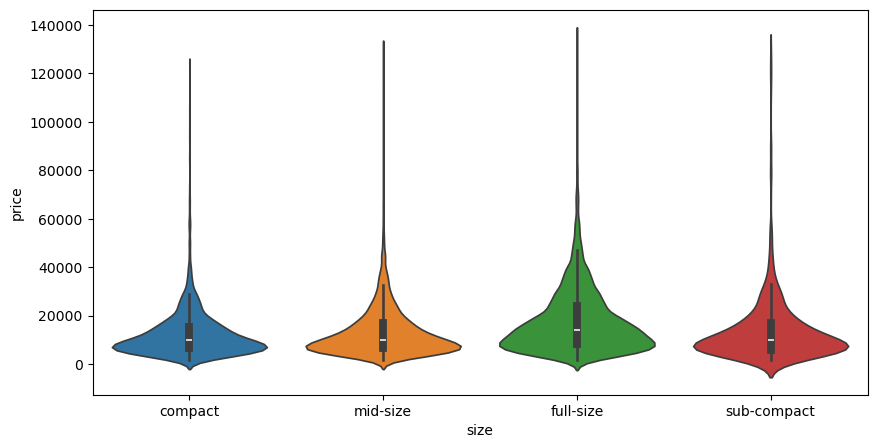

In [48]:
plt.figure(figsize = (10,5))
sns.violinplot(data = df_iqr, x = 'size', y = 'price', hue = 'size', legend = False);

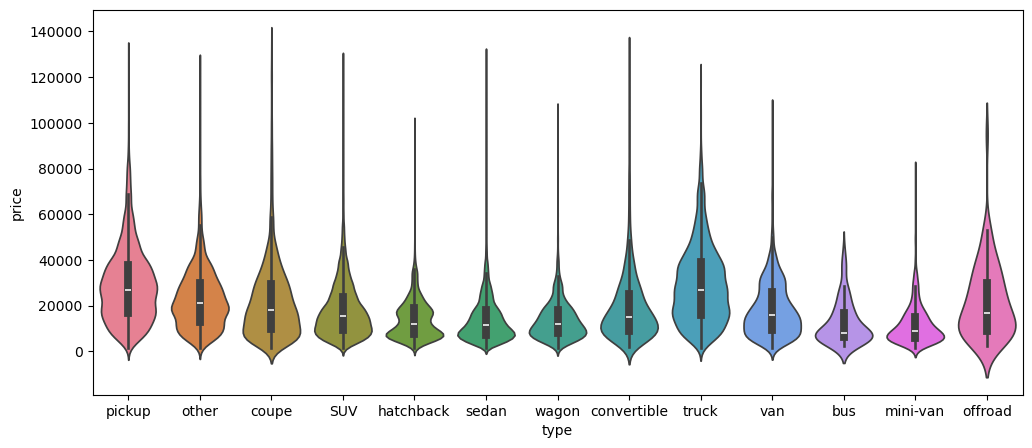

In [49]:
plt.figure(figsize = (12,5))
sns.violinplot(data = df_iqr, x = 'type', y = 'price', hue = 'type', legend = False);

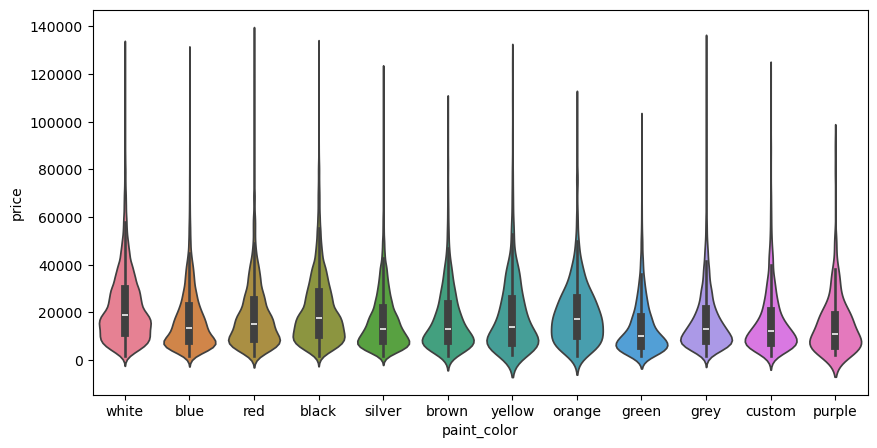

In [50]:
plt.figure(figsize = (10,5))
sns.violinplot(data = df_iqr, x = 'paint_color', y = 'price', hue = 'paint_color', legend = False);

Based on what I see in the violin plots, I liked the Fuel and Drive columns so I will keep these two categorical columns for the model and drop the other categorical columns.

In [51]:
df_iqr.groupby('fuel')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
fuel,,,,,,,,
diesel,5156,37324,20747,2000,19995,34988,50995,119999
electric,456,24947,18710,1900,11412,18681,37144,104990
gas,86566,17917,12752,1550,8500,14900,23995,135000
hybrid,1342,15663,11212,2495,7998,11999,19978,109999
other,6088,25619,14157,1595,15995,22990,32988,128995


In [52]:
df_iqr.groupby('drive')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
drive,,,,,,,,
4wd,34387,24490,16377,1595,11995,20499,33704,129991
fwd,31148,12782,7895,1550,6995,10995,16991,122420
rwd,12830,20929,14300,1550,10000,17995,28253,135000


In [53]:
df_model = df_iqr.drop(columns = ['manufacturer', 'condition', 'cylinders', 'title_status', 'transmission', 'size', 'type', 'paint_color']).copy()

In [54]:
df_model.head(5)

,price,year,fuel,odometer,drive,price_log
0,33590,2014,gas,57923,NaN,10
1,22590,2010,gas,71229,NaN,10
2,39590,2020,gas,19160,NaN,11
3,30990,2017,gas,41124,NaN,10
4,27990,2012,gas,68696,4wd,10


#### Handle Missing Values

In [55]:
df_model.isna().mean().multiply(100)

price        0
year         1
fuel         1
odometer     1
drive       22
price_log    0
dtype: float64

Still have 22% missing values in the Drive column and I don't have a good way to impute these missing values. The distribution of that column seems to be very close between 4wd and fwd with rwd having the least, so I don't think it would be a good idea to impute missing values based on the mode. To be on the safer side, I'm going to opt to just drop the missing values rows. There are also 1% missing values in the Year, Fuel, and Odometer columns which seems miniscule, so I will just drop these missing values rows as well.

In [56]:
df_model.dropna(axis = 0, inplace = True)

In [57]:
df_model.isna().sum()

price        0
year         0
fuel         0
odometer     0
drive        0
price_log    0
dtype: int64

#### Convert Categorical Columns to Numeric

I'll use pandas get_dummies function to one hot encode the fuel and drive categorical columns to numeric.

In [58]:
df_model = pd.get_dummies(df_model, columns = ['fuel', 'drive'], drop_first = True, dtype = int)

In [59]:
df_model.sample(5)

,price,year,odometer,price_log,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,drive_fwd,drive_rwd
9286,9995,1998,91819,9,0,1,0,0,0,1
29405,48900,2009,59449,11,0,1,0,0,0,1
71111,32900,2019,19233,10,0,1,0,0,0,1
94758,17999,2019,39729,10,0,1,0,0,1,0
99977,72999,2017,43919,11,0,0,0,0,0,0


### Modeling and Evaluation

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Linear Regression

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [61]:
X = df_model.drop(columns = ['price', 'price_log'], axis = 1)
y = df_model['price']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [63]:
lr = LinearRegression()

In [64]:
lr.fit(X_train, y_train)

LinearRegression()

In [65]:
y_preds = lr.predict(X_test)

In [66]:
mean_squared_error(y_preds, y_test)

130880221.36502287

In [67]:
root_mean_squared_error(y_preds, y_test)

11440.289391664131

Our linear regression model's predictions for the price of a car were about $11,440 off from the actual price on average.

In [68]:
lr.coef_

array([ 6.84326720e+02, -4.59771185e-02, -1.50567937e+04, -1.76213041e+04,
       -1.70388419e+04, -1.26113039e+04, -1.05415212e+04, -5.78620013e+02])

In [69]:
lr.score(X_train, y_train)

0.4666035989420897

In [70]:
coefficients = pd.DataFrame(lr.coef_, X_train.columns, columns = ['Coefficients'])
coefficients

,Coefficients
year,684
odometer,-0
fuel_electric,-15057
fuel_gas,-17621
fuel_hybrid,-17039
fuel_other,-12611
drive_fwd,-10542
drive_rwd,-579


- Price increases by \\$684 for every increase in year
- Price wasn't affected by a change in odometer (this is surprising)
- Electric, gas, and hybrid cars were \\$15,057, \\$17,621, and \\$17,039 cheaper respectively than diesel cars on average
- FWD and RWD cars were \\$10,542 and \\$579 cheaper than 4WD cars on average

#### Lasso and Ridge Regressions with Scaling and GridSearchCV

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [72]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [73]:
scaler = StandardScaler()

In [74]:
X_train_scaled[:] = scaler.fit_transform(X_train[:])
X_test_scaled[:] = scaler.transform(X_test[:])

In [75]:
X_train_scaled

,year,odometer,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,drive_fwd,drive_rwd
51073,-0,1,-0,0,-0,-0,-1,2
44524,-3,-1,-0,0,-0,-0,1,-0
81894,-1,1,-0,0,-0,-0,-1,-0
96034,1,-1,-0,0,-0,-0,-1,-0
30417,0,0,-0,0,-0,-0,1,-0
...,...,...,...,...,...,...,...,...
101515,1,-1,-0,0,-0,-0,-1,-0
90663,-0,1,-0,-3,-0,-0,-1,-0
32424,0,1,-0,0,-0,-0,-1,-0
16490,-2,1,-0,0,-0,-0,1,-0


In [76]:
lasso = Lasso()
ridge = Ridge()

In [77]:
alphas = [0, 0.1, 0.5, 1, 5, 10, 20, 50, 100]
parameters = {'alpha': alphas}

In [78]:
lasso_grid = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0, 0.1, 0.5, 1, 5, 10, 20, 50, 100]},
             scoring='neg_mean_squared_error')

In [79]:
lasso_grid.best_params_

{'alpha': 50}

In [80]:
ridge_grid = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0, 0.1, 0.5, 1, 5, 10, 20, 50, 100]},
             scoring='neg_mean_squared_error')

In [81]:
ridge_grid.best_params_

{'alpha': 100}

In [82]:
lasso = Lasso(alpha = 50)

In [83]:
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=50)

In [84]:
lasso_y_train_preds = lasso.predict(X_train_scaled)
lasso_y_test_preds = lasso.predict(X_test_scaled)

In [85]:
root_mean_squared_error(lasso_y_train_preds, y_train)

10382.577789288105

In [86]:
root_mean_squared_error(lasso_y_test_preds, y_test)

11413.438752769358

In [87]:
lasso.coef_

array([ 4718.05087304, -3842.88454306,  -969.05593725, -5610.3193578 ,
       -1887.11618119, -2544.62653223, -5115.86976331,  -152.62276154])

In [88]:
lasso.score(X_train_scaled, y_train)

0.4664002271347293

In [89]:
lasso_coefficients = pd.DataFrame(lasso.coef_, X_train_scaled.columns, columns = ['Coefficients'])
lasso_coefficients

,Coefficients
year,4718
odometer,-3843
fuel_electric,-969
fuel_gas,-5610
fuel_hybrid,-1887
fuel_other,-2545
drive_fwd,-5116
drive_rwd,-153


In [90]:
ridge = Ridge(alpha = 100)

In [91]:
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=100)

In [92]:
ridge_y_train_preds = ridge.predict(X_train_scaled)
ridge_y_test_preds = ridge.predict(X_test_scaled)

In [93]:
root_mean_squared_error(ridge_y_train_preds, y_train)

10380.625333229496

In [94]:
root_mean_squared_error(ridge_y_test_preds, y_test)

11437.388534836877

In [95]:
ridge.coef_

array([ 4740.85564427, -3894.91441405, -1057.98651768, -5800.55500976,
       -1998.55150619, -2713.64819429, -5153.09967959,  -212.52245964])

In [96]:
ridge.score(X_train_scaled, y_train)

0.46660089640431746

In [97]:
ridge_coefficients = pd.DataFrame(ridge.coef_, X_train_scaled.columns, columns = ['Coefficients'])
ridge_coefficients

,Coefficients
year,4741
odometer,-3895
fuel_electric,-1058
fuel_gas,-5801
fuel_hybrid,-1999
fuel_other,-2714
drive_fwd,-5153
drive_rwd,-213


Overall, the Lasso and Ridge regression models didn't appear to do much better than our standard Linear Regression model. Our model score of 46% wasn't that strong, so we probably excluded some important features from the dataset when we did our feature selection on the categorical columns. For next steps, we would probably want to add back a categorical variable one at a time and test our model again to see how much improvement we can get.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.